# 1

$$
x_n=\begin{cases} 0 & \text{for }n=0,\\1 & \text{for }n=1,\\ x_{n-1}+x_{n-2}& \text{for }n>1 \end{cases}
$$

In [15]:
# implementation of eq 1.4
def fibonacci_element_n(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fibonacci_element_n(n - 1) + fibonacci_element_n(n - 2)

## Time Complexity

The time complexity of the naive implementation of the Fibonacci sequence is $\mathcal{O}(2^n)$. This can be justified by examing the behaviour of the function by calling it with a general value of $n$:

Invoking the function for a general $n$ results in the function calling two more of itself. I.e. one call, becomes 2, becomes 4, becomes 8, which is only resolved after traversing a depth of $n$. Thus, the time complexity is $\mathcal{O}(2^n)$.

## Runtime

The runtime has been measured using the Python `time` module. The platform that ran the program is a home desktop computer with an Intel i7-6800K CPU (3.4GHz).

Error bars are computed by calculating the standard deviation, and using that as the size of the plotted bar.

The largest sequence number that I calculated is 31. If a higher value is used, it takes significantly longer, and conducting 10 experiments becomes prohibitively long.

In [16]:
# iterate over 100 datapoints, where n is incremented by two for each iteration
import time
import numpy as np

TIMES_REPEAT = 10
NUM_POINTS = 16
NUM_START = 15
data = np.ndarray(shape=(NUM_POINTS, 3), dtype=np.float32)

for n in range(NUM_START, NUM_START + NUM_POINTS):
    
    durations = np.zeros(TIMES_REPEAT)
    for i in range(0, TIMES_REPEAT):
        start = time.time()
        result = fibonacci_element_n(n)
        end = time.time()
        durations[i] = end - start
    
    duration = np.sum(durations) / TIMES_REPEAT
    error = np.sqrt(np.sum(np.power(durations - duration, 2)) / TIMES_REPEAT)
    data[n - NUM_START][:] = [n, duration, error]
    

Text(0, 0.5, 'Runtime (seconds)')

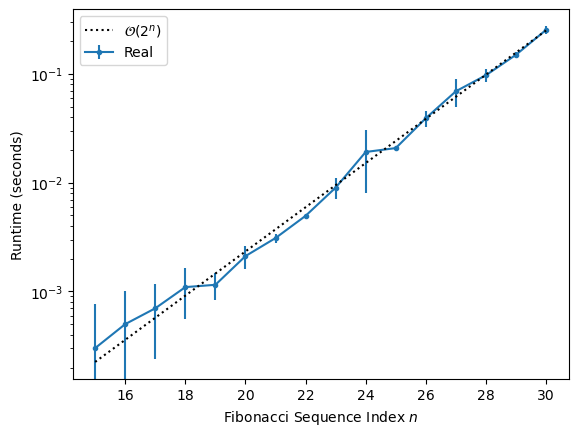

In [17]:
import matplotlib.pyplot as plt
import scipy.optimize as opt

def O2n(n, *params):
    return params[0] * np.power(params[1], (n - 16))

x, y, errors = data.T
fit, dd = opt.curve_fit(O2n, x, y, p0=[0.1, 2])
fig, ax = plt.subplots()

ax.errorbar(x, y, yerr=errors, marker='.', label="Real")
ax.plot(x, O2n(x, *fit), zorder=10, linestyle='dotted', color='black', label=r"$\mathcal{O}(2^n)$")
ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_xlabel('Fibonacci Sequence Index $n$')
ax.set_ylabel('Runtime (seconds)')


# plt.plot(x, np.asarray(y / 1000))

# 2

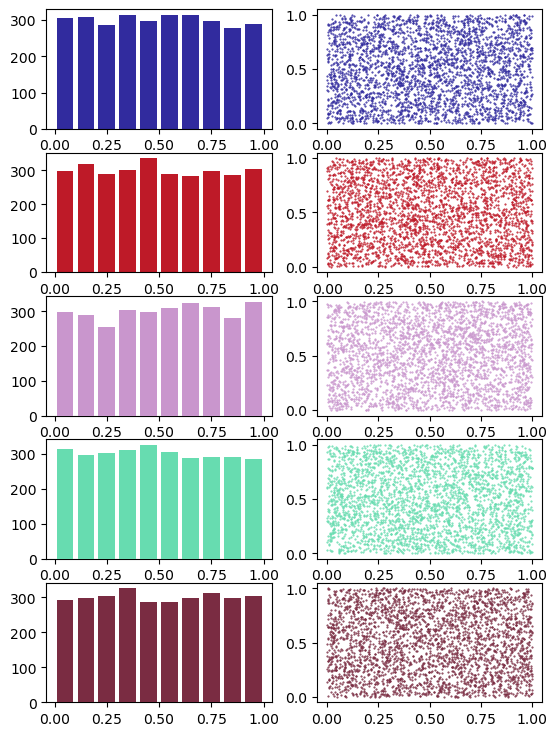

In [18]:
import time
import random

def lcg(x, a, c, m):
    while True:
        x = (int(a * x) + c) % m
        yield x

def random_uniform_sample(n, interval, a, c, m, seed=0):
    bsdrand = lcg(seed, a, c, m)

    lower, upper = interval[0], interval[1]
    sample = np.zeros(n)

    for i in range(n):
        observation = (upper - lower) * (next(bsdrand) / (m - 1)) + lower
        sample[i] = observation

    return sample


def run_samples(N, L, a, c, m):
    fig, axs = plt.subplots(nrows=N, ncols=2)
    fig.set_figheight(9)

    chars = [chr(ord('0') + i) for i in range(0, 10)] + [chr(ord('a') + i) for i in range(0, 6)]
    colors = [f"#{''.join(random.choice(chars) for i in range(6))}" for i in range(0, N)]
    
    samples = np.ndarray((N, L))

    for i in range(0, N):
        current_time = time.time()
        seed = current_time + i * 60
        sample = random_uniform_sample(L, [0., 1.], a=a, c=c, m=m, seed=seed)
        samples[i] = sample
        
        axs[i][0].hist(sample, bins=10, range=(0., 1.), color=colors[i], rwidth=0.8, zorder=i+1)
        
        samplep = sample[1:]
        sample = sample[0:L-1]
        axs[i][1].plot(sample, samplep, '.', color=colors[i], markersize=1)
    
    return samples
        

a, c, m = 1103515245, 12345, 2 ** 31
N = 5
L = 3000
samples = run_samples(N, L, a, c, m)


## Randomness

Analyzing the output, it seems that the randomly generated numbers are generally quite random, looking at both the frequency plot (left-hand side) and the plane generated by plotting points with their first lagged neighbour. The output values will change depending on the seed.

# 3

In [19]:
a_list, m_list = zip(*[
    (55, 251), 
    (995, 2039), 
    (22661, 32749), 
    (33285, 65521),
    (6682268, 8388593)
])

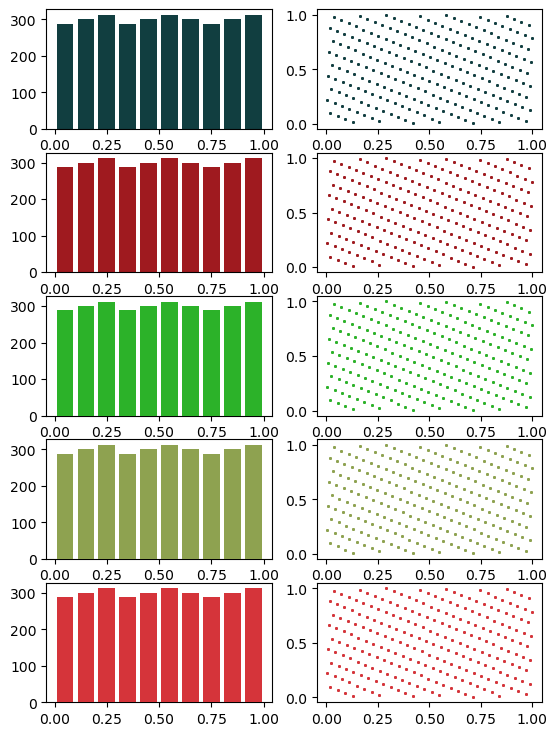

In [20]:
a, c, m = a_list[0], 0, m_list[0]
samples = run_samples(N, L, a, c, m)

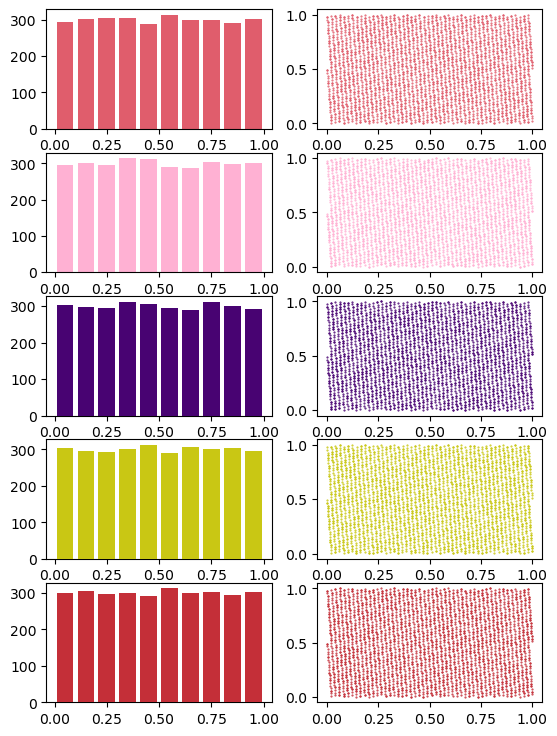

In [21]:
a, c, m = a_list[1], 0, m_list[1]
samples = run_samples(N, L, a, c, m)

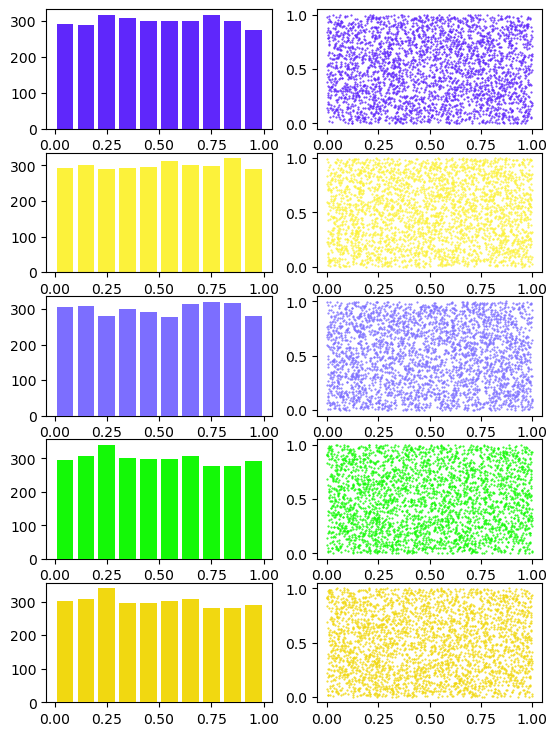

In [22]:
a, c, m = a_list[2], 0, m_list[2]
samples = run_samples(N, L, a, c, m)

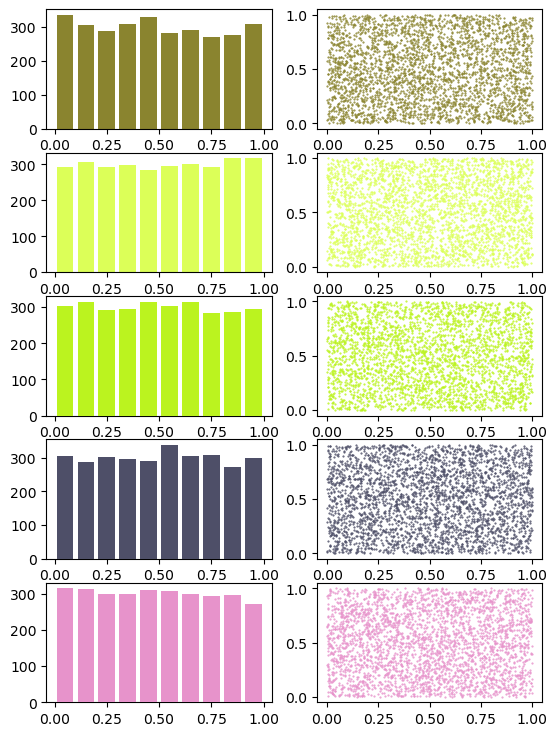

In [23]:
a, c, m = a_list[3], 0, m_list[3]
samples = run_samples(N, L, a, c, m)

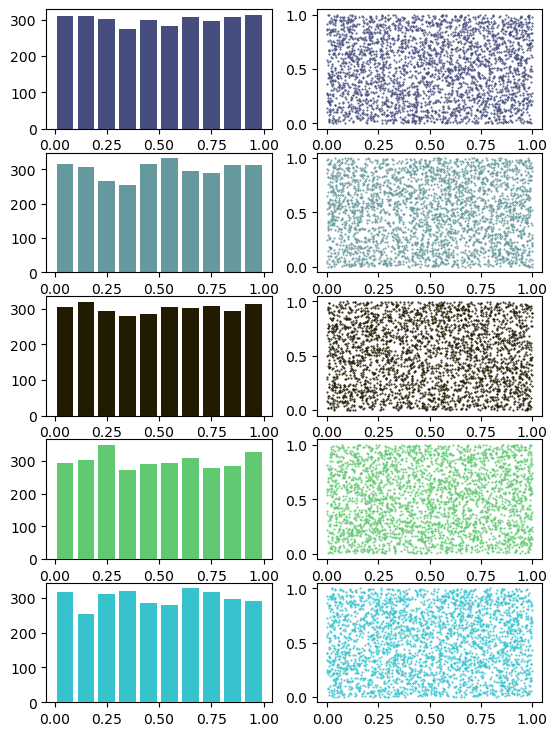

In [24]:
a, c, m = a_list[4], 0, m_list[4]
samples = run_samples(N, L, a, c, m)

In [25]:
print("| $a$ | $m$ |")
print("| --- | --- |")
for a, m in zip(a_list, m_list):
    print(f"| ${a}$ | ${m}$ |")
    

| $a$ | $m$ |
| --- | --- |
| $55$ | $251$ |
| $995$ | $2039$ |
| $22661$ | $32749$ |
| $33285$ | $65521$ |
| $6682268$ | $8388593$ |


## How do different choices of $a$ and $m$ affect the sequence?

All values of $c$ are zero. These particular values were chosen from the work by L'Ecuyer (1999), which specifically identified $m$ and $a$ pairs corresponding to acceptable randomness, that is, exhibits good "lattice structure". 

Different (large) values of $a$ and $m$ don't seem to affect the appearance of the randomness for large $m$ and $a$, but this is definitely not the case for the first two choices. The first two pairs of $a$ and $m$ exhibit artifacts where hyperplanes appear in the "first-lagged value" plot, which is particularly pronounced in the first pair.

| $a$ | $m$ |
| --- | --- |
| $55$ | $251$ |
| $995$ | $2039$ |
| $22661$ | $32749$ |
| $33285$ | $65521$ |
| $6682268$ | $8388593$ |

[1]  L'Ecuyer (1999), "Tables of linear congruential generators of different sizes and good lattice structure", Math.Comp. 68, pp. 249-260.

# 4


means=
 -> 0.50058097
 -> 0.49886918
 -> 0.4975988
 -> 0.49737895
 -> 0.5034818
standard deviations:
 -> 0.28638419972849016
 -> 0.2883716999427672
 -> 0.2887798797351325
 -> 0.2853846042827262
 -> 0.2876469042643589
mean of the means=0.4995819628238678




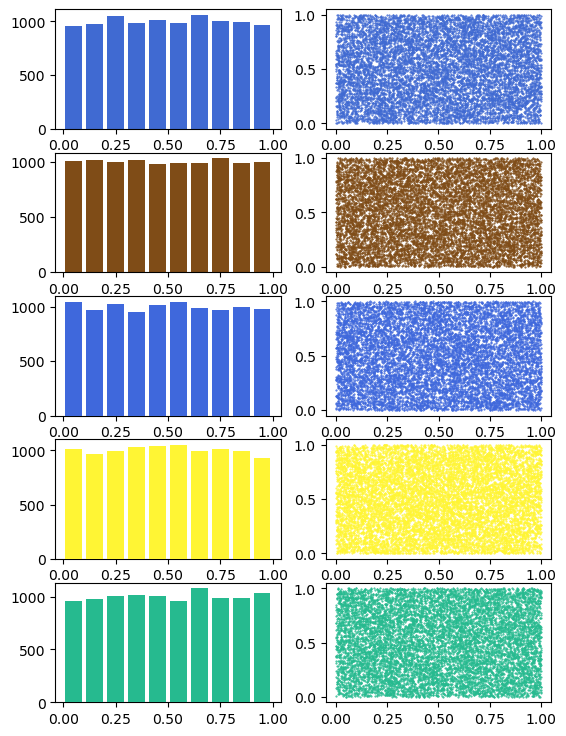

In [26]:
a, c, m = 1103515245, 12345, 2 ** 31
samples = run_samples(N, 10000, a, c, m)

means = np.fromiter((sample.mean() for sample in samples), dtype=np.float32)
mean = means.mean()
stddevs = np.sqrt(samples.var(1))

sep = '\n -> '
print(f"""
means={sep}{sep.join([str(mean) for mean in means])}
standard deviations:{sep}{sep.join([str(stddev) for stddev in stddevs])}
mean of the means={mean}

""")


## Do the samples conform to expectations for pseudorandom numbers?

Both the means and the standard deviation seem to exhibit good values: they are all very similar, and the means are all almost equal to 0.5, which should be expected of a uniform sample between 0 and 1.

# 5

Two numbers are coprime, by definition, if the only positive integer that is divisor of both is 1.


## 15 and 25
In the case of 15 and 25, they have a mutual divisor of 5, so they are not coprime.

## 8 and 15
In this case, they are coprime because they only share a divisor of 1. Divisors of 8: 1, 2, 4 and 8. Divisors of 15: 1, 3, 5 and 15.

## 9 and 16
These are also coprime, since they only share a divisor of 1. Divisors of 9: 1, 3 and 9. Divisors of 16: 2, 4, 8 and 16.

# 5

The Hull-Dobell Theorem:

1. Condition on $c$: The increment $c$ must be relatively prime to $m^a$. 
2. Condition on $a$: $a - 1$ is divisible by all prime factors of $m$.
3. Condition for even modulus: If $m$ is a multiple of 4, then $a - 1$ should be divisible by 4.

In our case, we have $m = 16$, $a=5$ and $c=3$. We check the conditions one-by-one:

## Condition 1

$c$ must be relatively prime to $m^a$. 

$m^a = 16^5$. This is simple since $c=3$ only has 2 divisors: 1 and itself. We can see that $3 \nmid 16$, and so $3$ cannot divide $m^a$ either since if a number does not divide any terms of a product, it cannot divide the product either. (The product is $16 \cdot 16 \cdot 16 \cdot 16 \cdot 16$). Therefore, condition 1 is satisfied.

## Condition 2

$a-1 = 4$. The only prime factor of $m$ is $2$, with no other prime factors (the other divisors are 4, 8 and 16, which are nonprime). Since $ 2 \mid 4$, then condition 2 is satisfied.

## Condition 3

We do have an even modulus, which is $m=16$. Thus we have to check if $a-1$ is divisible by 4. Since $a-1$ is equal to 4, and every number is its own divisor, then we see that condition 3 is also satisfied. 

## Conclusion

Therefore, this LCG satisfies the Hull-Dobell Theorem.

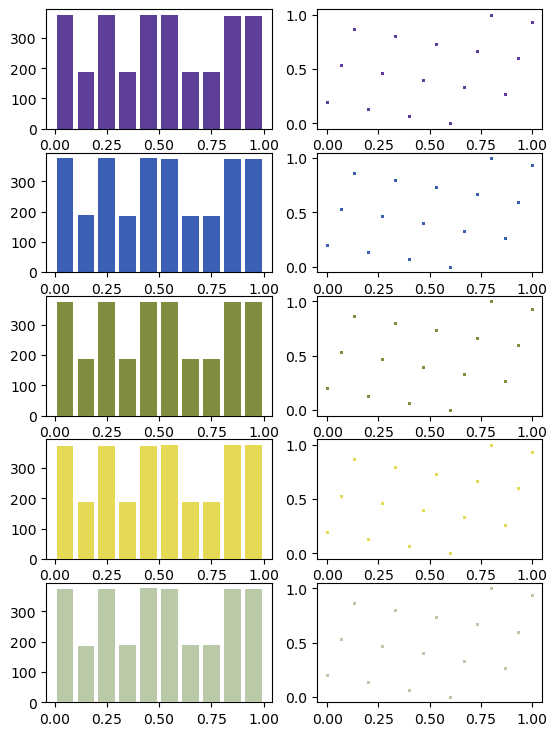

In [27]:
a, c, m = 5, 3, 16
samples = run_samples(N, L, a, c, m)

## Does it work?

Even though this LCG satisfies the Hull-Dobell Theorem, we see that it does not actually result in a proper random number generator. Regardless of the seed, the numbers are quite deterministic.